# ML2 2.1 - Unsupervised Learning Algorithms Part 1

### This script contains the following:

#### 1. Import Libraries
#### 2. Cleaning Data
        Scaling Data
        Merging
        Scatterplot
        Pair Plot
#### 3. Dendogram
        Scaled Data
#### 4. Principle Component Analysis
#### 5. Exporting

### 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [4]:
climate = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\DataSet\European Climate Assessment and Data Set Project.csv')

In [5]:
pleasant = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning\ClimateWins\DataSet\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [6]:
climate.head(20)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4
5,19600106,1,1,2.1,0.78,1.018,0.76,0.00,0,7.7,...,5,0.76,1.0326,0.33,0.00,0,0.9,4.1,-0.6,8.7
6,19600107,1,3,2.1,0.87,1.018,0.66,0.00,0,5.4,...,7,0.73,1.0230,0.42,0.00,0,2.2,7.9,4.4,11.4
7,19600108,1,8,2.1,0.95,1.018,0.19,0.09,0,0.0,...,2,0.72,1.0203,0.50,0.00,0,6.2,8.5,6.7,10.3
8,19600109,1,8,2.1,0.98,1.018,0.19,0.56,0,0.0,...,5,0.67,1.0243,0.14,0.00,0,0.1,6.8,5.8,7.8
9,19600110,1,3,2.1,0.74,1.018,0.38,0.01,5,1.1,...,1,0.66,1.0307,0.49,0.00,0,6.4,1.8,0.2,5.0


In [11]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Columns: 170 entries, DATE to VALENTIA_temp_max
dtypes: float64(145), int64(25)
memory usage: 29.8 MB


In [13]:
climate.shape

(22950, 170)

In [15]:
pleasant.head(20)

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,19600106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,19600107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,19600108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,19600109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,19600110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
pleasant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22950 entries, 0 to 22949
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   DATE                         22950 non-null  int64
 1   BASEL_pleasant_weather       22950 non-null  int64
 2   BELGRADE_pleasant_weather    22950 non-null  int64
 3   BUDAPEST_pleasant_weather    22950 non-null  int64
 4   DEBILT_pleasant_weather      22950 non-null  int64
 5   DUSSELDORF_pleasant_weather  22950 non-null  int64
 6   HEATHROW_pleasant_weather    22950 non-null  int64
 7   KASSEL_pleasant_weather      22950 non-null  int64
 8   LJUBLJANA_pleasant_weather   22950 non-null  int64
 9   MAASTRICHT_pleasant_weather  22950 non-null  int64
 10  MADRID_pleasant_weather      22950 non-null  int64
 11  MUNCHENB_pleasant_weather    22950 non-null  int64
 12  OSLO_pleasant_weather        22950 non-null  int64
 13  SONNBLICK_pleasant_weather   22950 non-null  i

In [19]:
pleasant.shape

(22950, 16)

### 2. Cleaning Data

In [21]:
missing_values = climate.isnull().sum()

In [23]:
print(missing_values)

DATE                   0
MONTH                  0
BASEL_cloud_cover      0
BASEL_wind_speed       0
BASEL_humidity         0
                      ..
VALENTIA_snow_depth    0
VALENTIA_sunshine      0
VALENTIA_temp_mean     0
VALENTIA_temp_min      0
VALENTIA_temp_max      0
Length: 170, dtype: int64


In [25]:
climate_dups = climate[climate.duplicated()]

In [27]:
climate_dups

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max


In [29]:
missing_values_p = pleasant.isnull().sum()

In [31]:
print(missing_values_p)

DATE                           0
BASEL_pleasant_weather         0
BELGRADE_pleasant_weather      0
BUDAPEST_pleasant_weather      0
DEBILT_pleasant_weather        0
DUSSELDORF_pleasant_weather    0
HEATHROW_pleasant_weather      0
KASSEL_pleasant_weather        0
LJUBLJANA_pleasant_weather     0
MAASTRICHT_pleasant_weather    0
MADRID_pleasant_weather        0
MUNCHENB_pleasant_weather      0
OSLO_pleasant_weather          0
SONNBLICK_pleasant_weather     0
STOCKHOLM_pleasant_weather     0
VALENTIA_pleasant_weather      0
dtype: int64


In [33]:
pleasant_dups = pleasant[pleasant.duplicated()]

In [35]:
pleasant_dups

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather


In [38]:
# Dropping columns GDANSK,ROMA,TOURS as they are not in the pleasant weather dataset.

climate_drop_col = climate.drop(columns=['GDANSK_cloud_cover',
 'GDANSK_humidity',
 'GDANSK_precipitation',
 'GDANSK_snow_depth',
 'GDANSK_temp_mean',
 'GDANSK_temp_min',
 'GDANSK_temp_max',
 'ROMA_cloud_cover',
 'ROMA_wind_speed',
 'ROMA_humidity',
 'ROMA_pressure',
 'ROMA_sunshine',
 'ROMA_temp_mean',
 'TOURS_wind_speed',
 'TOURS_humidity',
 'TOURS_pressure',
 'TOURS_global_radiation',
 'TOURS_precipitation',
 'TOURS_temp_mean',
 'TOURS_temp_min',
 'TOURS_temp_max'])

In [40]:
climate_dc = climate_drop_col.columns.tolist()
climate_dc

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [44]:
climate_drop_col.shape

(22950, 149)

##### There are no duplicates or missing values in the either the climate dataset or the pleasant weather dataset. Columns have been dropped that do no align with the pleasant weather dataset.

#### Scaling Data

In [47]:
# Creating scaling object 

scaler = StandardScaler()

In [51]:
# Scaling the climate dataset

climate_drop_col_scaled = pd.DataFrame(scaler.fit_transform(climate_drop_col), columns=climate_drop_col.columns, index=climate_drop_col.index)
climate_drop_col_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.707663,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,-1.707657,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,-1.707652,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,-1.707646,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,-1.707641,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [81]:
# Calling the original DATE from the cliamte dataset to the scaled data set
# Using the original data set that has the same dropped columns as the scaled data set.

climate_drop_col_scaled['DATE'] = climate_drop_col['DATE']

In [83]:
climate_drop_col_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [55]:
# Comparing the origial climate datat to the scaled data

climate_drop_col.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


##### Now I have the original data with the dropped columns GDANSK/ROMA/TOURS with the appropriate dates (TOP) and I have the scaled data with the dropped columns GDANSK/ROMA/TOURS with the appropriate dates (BOTTOM).

In [87]:
# Simplifying the dataset names

climate_scaled = climate_drop_col_scaled

In [89]:
# Simplifying the dataset names

climate_og = climate_drop_col

In [91]:
climate_scaled.shape

(22950, 149)

In [93]:
climate_og.shape

(22950, 149)

##### I will be using climate_scaled and climate_og in the remaining script unless otherwise changed.

#### Merging Climate and Pleasant Weather

In [95]:
# Merging original climate and pleasant

pleasant_climate_merged = pd.merge(climate_og, pleasant, on='DATE', how='outer')

In [97]:
pleasant_climate_merged.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,0,0,0,0,0,0,0,0,0,0
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,0,0,0,0,0,0,0,0,0,0
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,0,0,0,0,0,0,0,0,0,0
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,0,0,0,0,0,0,0,0,0,0


In [99]:
column_names_merged = pleasant_climate_merged.columns.tolist()

In [101]:
column_names_merged

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [103]:
pleasant_climate_merged.shape

(22950, 164)

In [105]:
# Merging scaled climate and pleasant data to create scatterplot

pc_scaled_merged = pd.merge(climate_scaled, pleasant, on='DATE', how='outer')

In [114]:
pc_scaled_merged.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,0,0,0,0,0,0,0,0,0,0
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0,0,0,0,0,0,0,0,0,0
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0,0,0,0,0,0,0,0,0,0
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0,0,0,0,0,0,0,0,0,0
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,0,0,0,0,0,0,0,0,0,0


In [108]:
pc_names_merged = pc_scaled_merged.columns.tolist()

In [110]:
pc_names_merged

['DATE',
 'MONTH',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 

In [112]:
pc_scaled_merged.shape

(22950, 164)

In [118]:
# Simplifying the names of the merged dataset

pclimate = pleasant_climate_merged

In [120]:
# Simplifying the names of the merged scaled dataset

pc_scaled = pc_scaled_merged

In [122]:
pclimate.shape

(22950, 164)

In [124]:
pc_scaled.shape

(22950, 164)

##### I now have a combined dataset of climate and pleasant weather in their unscaled form and I have a combined dataset of scaled climate and pleasant weather to use. New names have been created for the dataset to make it easier to use. 

#### Scatterplot

In [127]:
# Subset for plotting the Dusseldorf data

columns = ['DUSSELDORF_temp_max', 'DUSSELDORF_snow_depth', 'DUSSELDORF_pleasant_weather']
pcs2 = pc_scaled[columns]

In [129]:
pcs2

,DUSSELDORF_temp_max,DUSSELDORF_snow_depth,DUSSELDORF_pleasant_weather
0,-0.410423,-0.131344,0
1,-0.473486,-0.131344,0
2,-0.713127,-0.131344,0
3,-0.851866,-0.131344,0
4,-0.473486,-0.131344,0
...,...,...,...
22945,0.838231,-0.131344,0
22946,1.153548,-0.131344,0
22947,0.913907,-0.131344,0
22948,0.800393,-0.131344,0


([<matplotlib.axis.XTick at 0x232c66f2120>,
 [Text(0, 0, '-0.13134430748910503'),
  Text(8, 0, '6.045606218894011'),
  Text(16, 0, '12.222556745277126'),
  Text(27, 0, ''),
  Text(42, 0, '')])

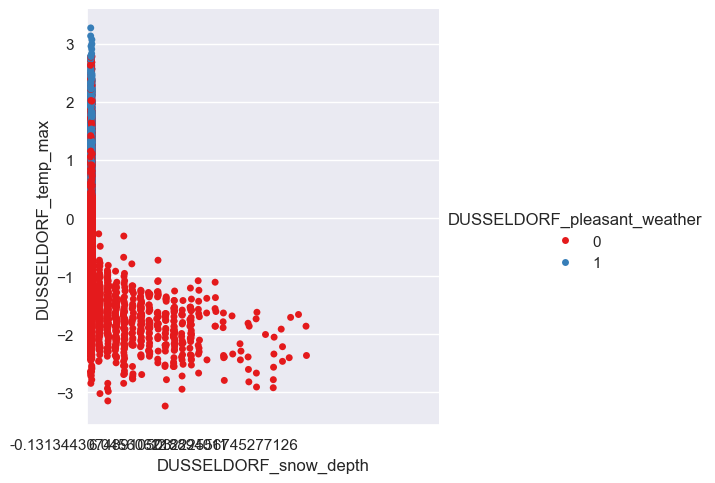

In [131]:
# Scatter plot based on two weather station parameters and color based on pleasant weather

sns.set_theme()
g = sns.catplot(x="DUSSELDORF_snow_depth", y="DUSSELDORF_temp_max", hue="DUSSELDORF_pleasant_weather", palette='Set1', data=pcs2)
plt.savefig('Dusseldorf snow max temp Scatterplot.png')
plt.xticks([0, 8, 16, 27, 42])

##### In this scatter plot we can see that the higher the snow depth measures the less likely for pleasant weather. Also the lower the temperature the less likely for pleasant weather. However, the increased temperature and decreased snow depth offers more pleasant weather.

#### Pair Plot

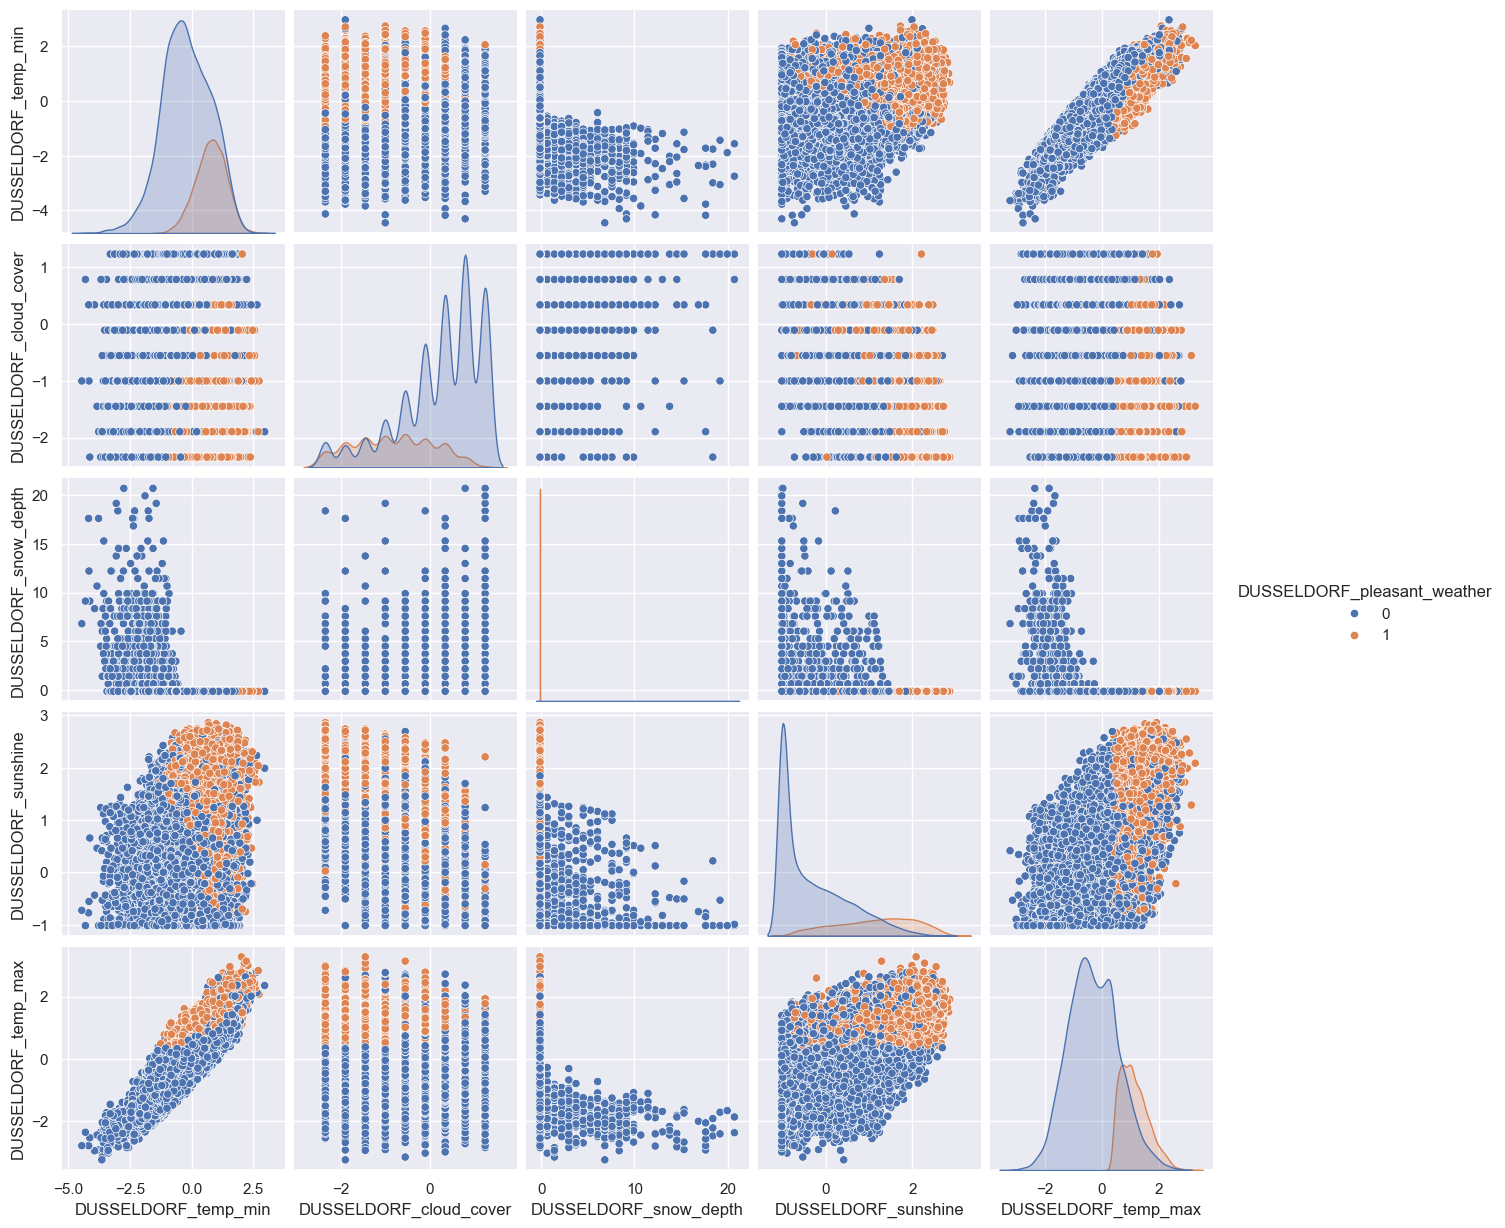

In [133]:
# Pair Plot created from 5 columns and the color based on pleasant weather

sns.pairplot(pc_scaled[['DUSSELDORF_pleasant_weather', 'DUSSELDORF_temp_min', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_snow_depth', 'DUSSELDORF_sunshine', 'DUSSELDORF_temp_max']], hue = 'DUSSELDORF_pleasant_weather')
plt.savefig('Dusseldorf min temp, precipitation, snow, sunshine, max temp Pair Plot.png')
plt.show()

### 3. Dendogram

In [145]:
# Preparing pclimate data set, calling a year to run the four dendograms on.

pclimate_2000 = pclimate[pclimate['DATE'].astype(str).str.contains('2000')]

In [147]:
# Drop the MONTH column

pclimate_2000 = pclimate_2000.drop('MONTH', axis = 1)

In [149]:
pclimate_2000

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,8,2.1,0.89,1.0286,0.20,0.03,0,0.0,2.9,...,0,0,0,0,0,0,0,0,0,0
14611,20000102,8,2.1,0.87,1.0318,0.25,0.00,0,0.0,3.6,...,0,0,0,0,0,0,0,0,0,0
14612,20000103,5,2.1,0.81,1.0314,0.50,0.00,0,3.7,2.2,...,0,0,0,0,0,0,0,0,0,0
14613,20000104,7,2.1,0.79,1.0262,0.63,0.35,0,6.9,3.9,...,0,0,0,0,0,0,0,0,0,0
14614,20000105,5,2.1,0.90,1.0246,0.51,0.07,0,3.7,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,5,2.1,0.83,0.9921,0.37,0.04,0,1.7,5.2,...,0,0,0,0,0,0,0,0,0,0
14972,20001228,6,2.1,0.80,1.0002,0.17,0.01,0,1.1,2.6,...,0,0,0,0,0,0,0,0,0,0
14973,20001229,8,2.1,0.81,1.0021,0.16,0.17,0,0.0,1.1,...,0,0,0,0,0,0,0,0,0,0
14974,20001230,4,2.1,0.77,1.0069,0.43,0.01,1,3.3,1.0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Preparing pc_scaled data set, calling a year to run the four dendograms on.

pc_scaled_2000 = pc_scaled[pc_scaled['DATE'].astype(str).str.contains('2000')]

In [153]:
# Drop the MONTH column

pc_scaled_2000 = pc_scaled_2000.drop('MONTH', axis = 1)

In [155]:
pc_scaled_2000

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,0,0
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,0,0
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,0,0
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,0,0
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971,20001227,-0.170720,-0.02793,0.645423,-3.960519,-1.047368,-0.365351,-0.179228,-0.670938,-0.705172,...,0,0,0,0,0,0,0,0,0,0
14972,20001228,0.244897,-0.02793,0.374412,-2.722511,-1.262159,-0.425473,-0.179228,-0.810126,-1.058269,...,0,0,0,0,0,0,0,0,0,0
14973,20001229,1.076130,-0.02793,0.464749,-2.432114,-1.272899,-0.104822,-0.179228,-1.065304,-1.261978,...,0,0,0,0,0,0,0,0,0,0
14974,20001230,-0.586336,-0.02793,0.103401,-1.698479,-0.982931,-0.425473,0.319230,-0.299770,-1.275559,...,0,0,0,0,0,0,0,0,0,0


#### Dendogram with Scaled data (single, complete, average, and ward)

##### Single

In [300]:
# Loading specific libraries for hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

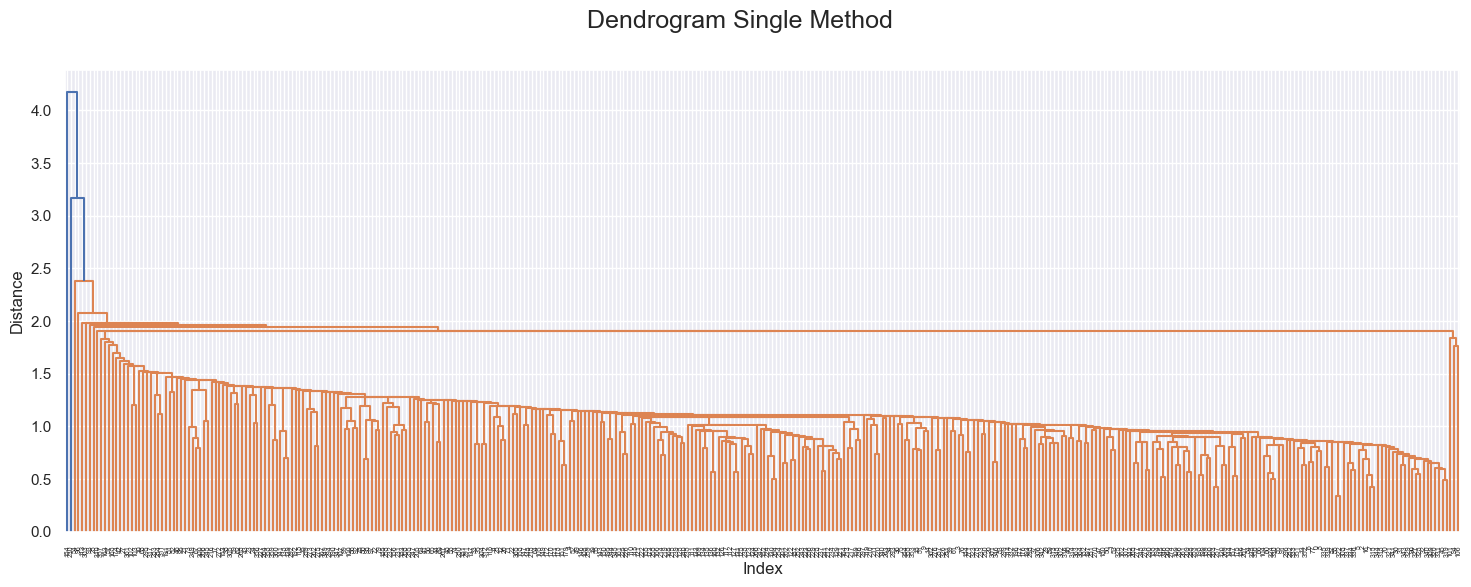

In [302]:
# Single Dendogram (using pc_scaled_2000 data)

distance_single = linkage(pc_scaled_2000.loc[:,['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'KASSEL_pleasant_weather']],method='single')
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.savefig('Dendrogram Single Method - Scaled Climate Data for Kassel Year 2000.png')
plt.show()

In [304]:
pc_scaled_2000_SM=pc_scaled_2000.copy()

pc_scaled_2000_SM['clust2']=fcluster(distance_single,2, criterion='maxclust')
pc_scaled_2000_SM['clust3']=fcluster(distance_single,3, criterion='maxclust')
pc_scaled_2000_SM.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,clust2,clust3
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,1,1
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,1,1
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,1,1
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,1,1
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,1,1


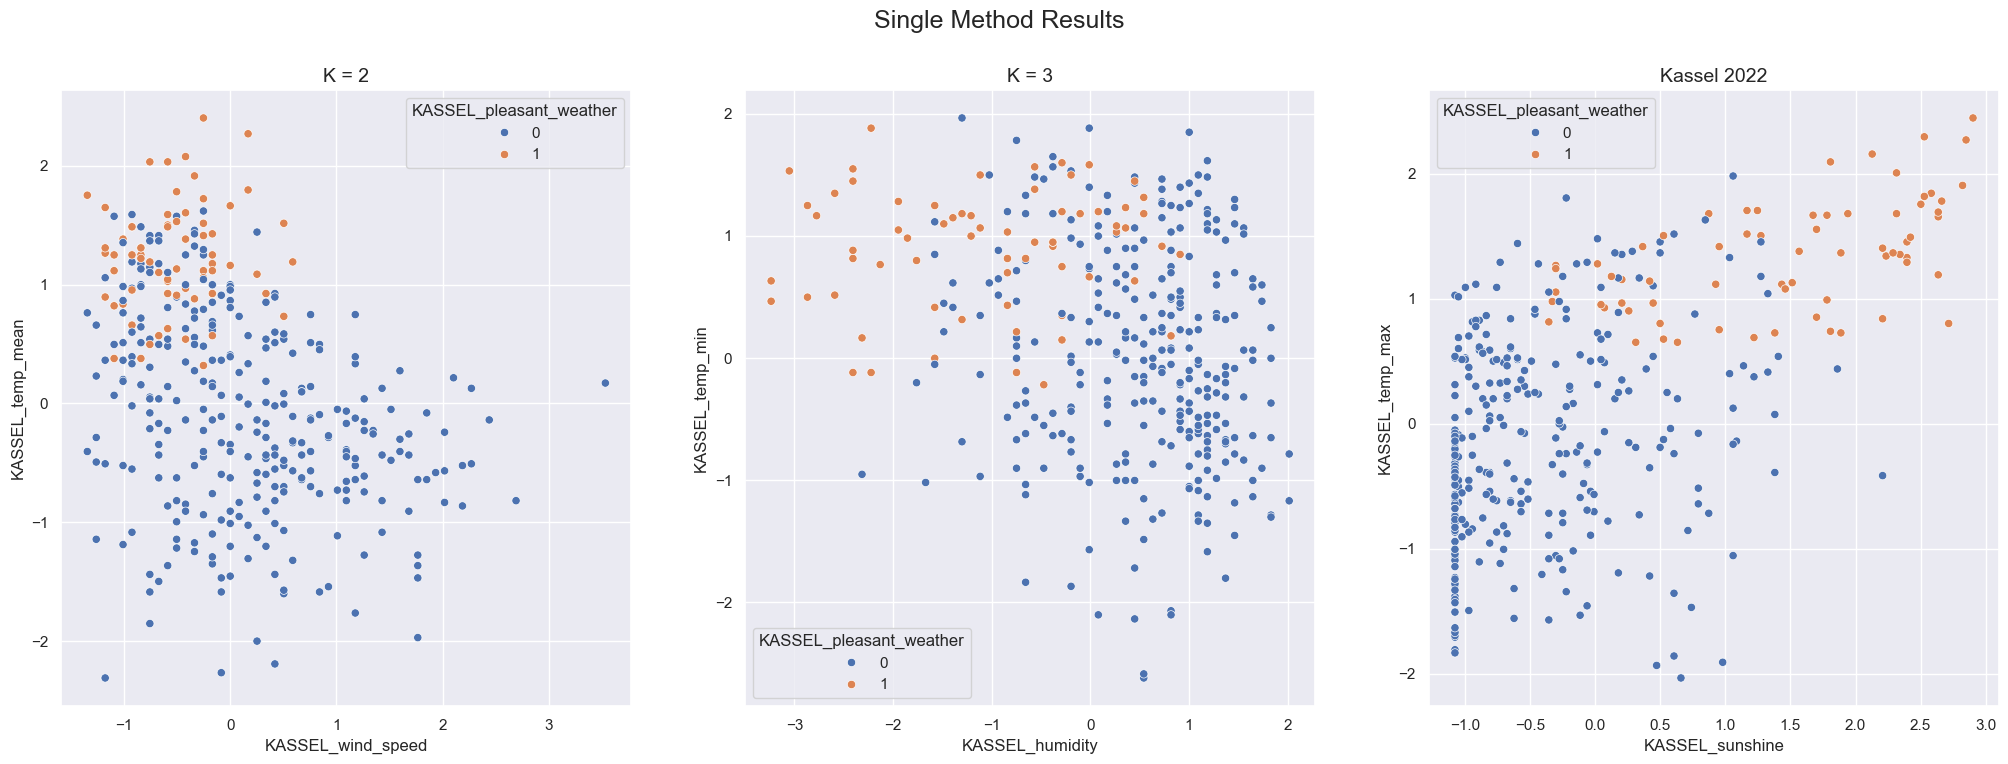

In [306]:
# Plot the clusters against the answers

plt.figure(figsize=(25,8))

plt.suptitle("Single Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="KASSEL_wind_speed",y="KASSEL_temp_mean", data=pc_scaled_2000_SM, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="KASSEL_humidity",y="KASSEL_temp_min", data=pc_scaled_2000_SM, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,3)
plt.title("Kassel 2022",fontsize=14)
sns.scatterplot(x="KASSEL_sunshine",y="KASSEL_temp_max", data=pc_scaled_2000_SM, hue="KASSEL_pleasant_weather")
plt.savefig('Scatter Plot Kassel 2000_single.png')

###### The pleasant weather is represented by 0 = unpleasant and 1= pleasant. The first scatterplot comparing the Mean Temps and Wind Speed shows that when the wind speeds are low and the mean temps are between the scaled values of 0-3 most dats are pleasant. 
###### The second scatterplot comparing Minimum Temps and Humidity shows that the less humidity and the higher the minimum temperature the more pleasant the day.
###### The third scatterplot comparing Max temps and Sunshine show that the sunnier the day with a max temp that falls within the scaled values of 0.5-3 are more pleasant. 

C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points

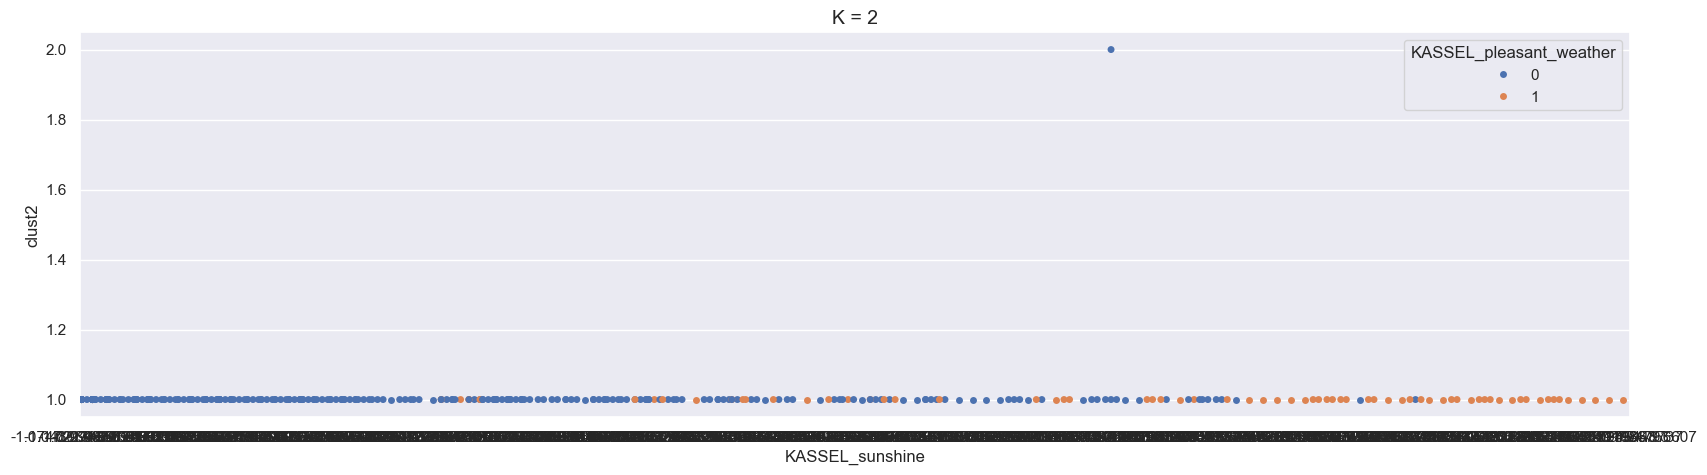

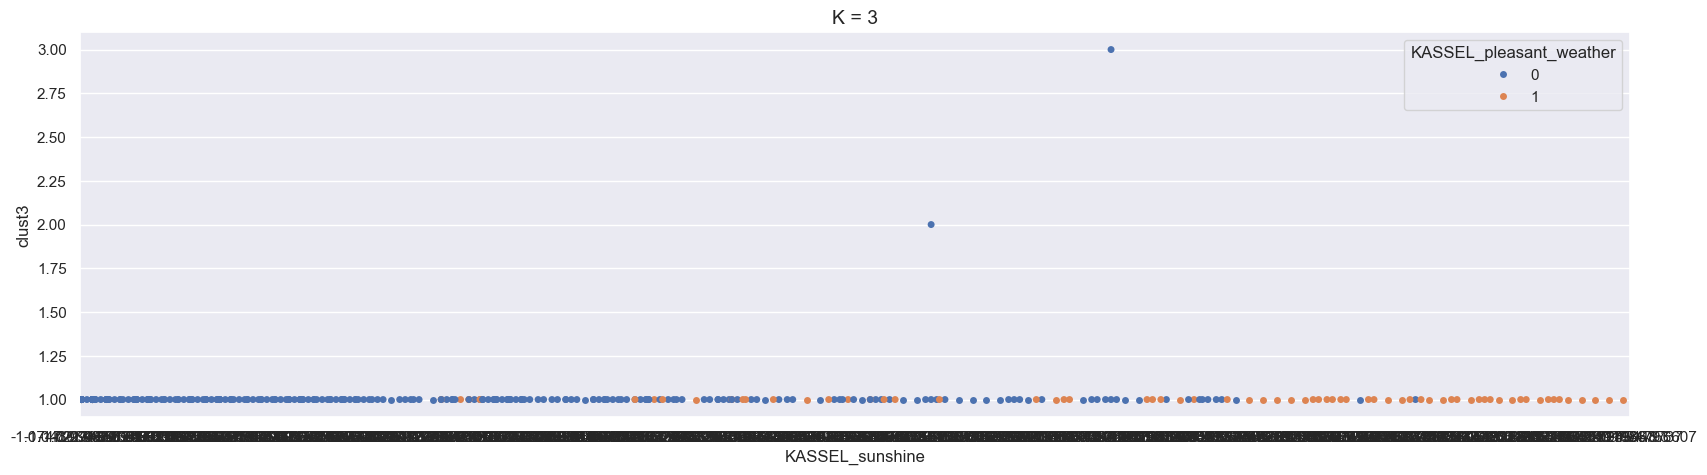

In [379]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust2", data=pc_scaled_2000_SM, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot Kassel_sunshine 2000_2cluster_single.png')

plt.figure(figsize=(20,5))
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust3", data=pc_scaled_2000_SM, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot KASSEL_sunshine 2000_3cluster_single.png')

##### Complete

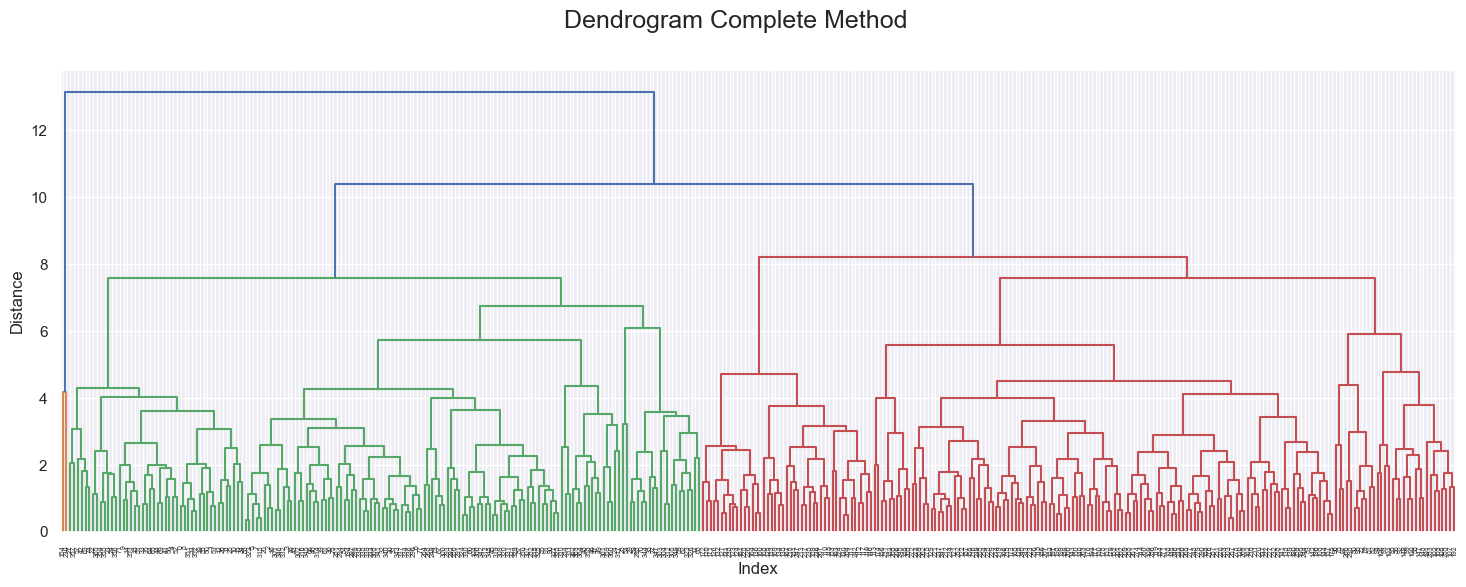

In [339]:
# Complete Dendogram (using pc_scaled_2000 data)

distance_complete = linkage(pc_scaled_2000.loc[:,['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'KASSEL_pleasant_weather']],method='complete')
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.savefig('Dendrogram Complete Method - Scaled Climate Data for Kassel Year 2000.png')
plt.show()

In [341]:
pc_scaled_2000_comp=pc_scaled_2000.copy()

pc_scaled_2000_comp['clust2']=fcluster(distance_complete,2, criterion='maxclust')
pc_scaled_2000_comp['clust3']=fcluster(distance_complete,3, criterion='maxclust')
pc_scaled_2000_comp.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,clust2,clust3
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,2,2
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,2,2
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,2,2
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,2,2
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,2,2


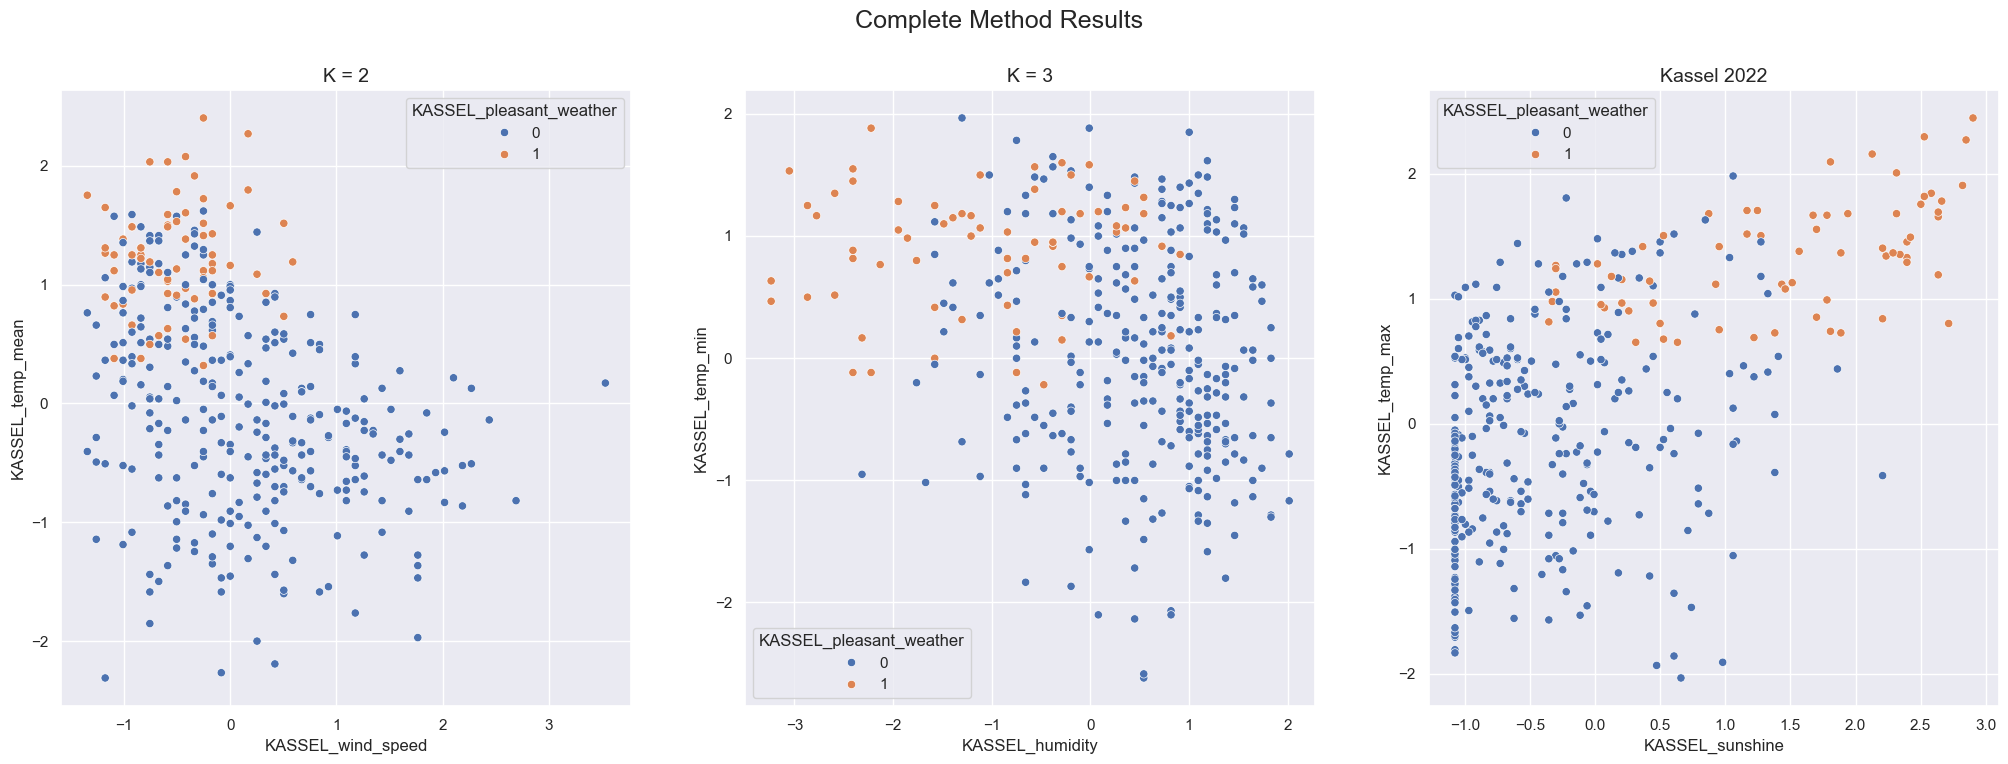

In [343]:
# Plot the clusters against the answers

plt.figure(figsize=(25,8))

plt.suptitle("Complete Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="KASSEL_wind_speed",y="KASSEL_temp_mean", data=pc_scaled_2000_comp, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="KASSEL_humidity",y="KASSEL_temp_min", data=pc_scaled_2000_comp, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,3)
plt.title("Kassel 2022",fontsize=14)
sns.scatterplot(x="KASSEL_sunshine",y="KASSEL_temp_max", data=pc_scaled_2000_comp, hue="KASSEL_pleasant_weather")
plt.savefig('Scatter Plot Kassel 2000_complete.png')

C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points

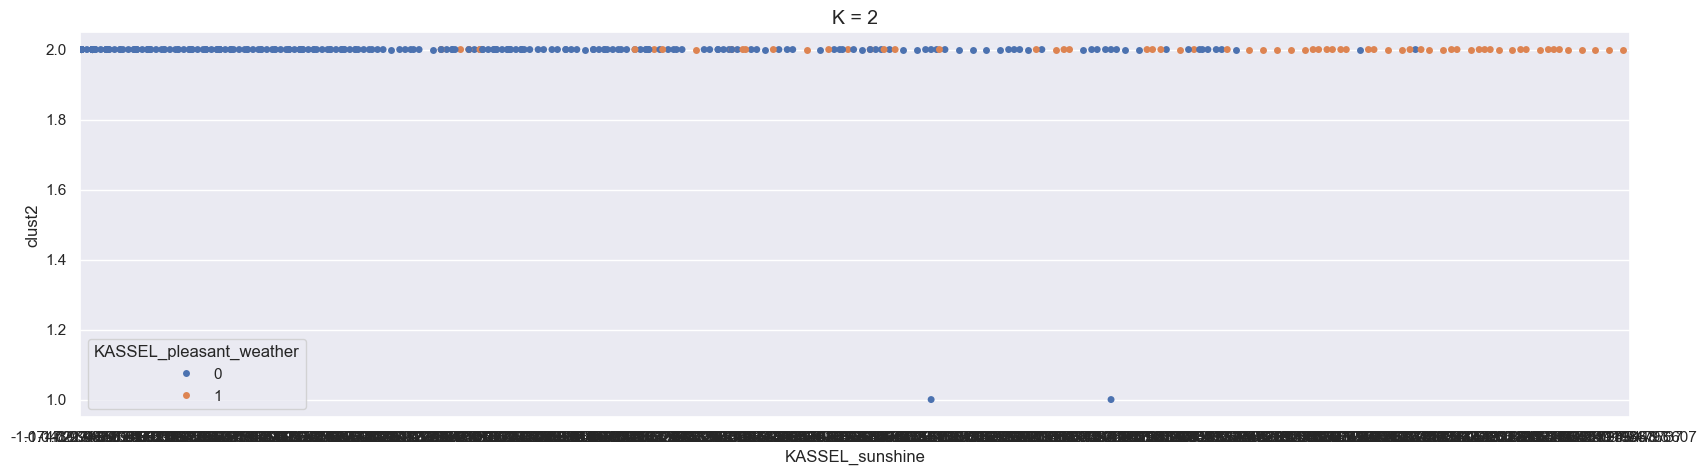

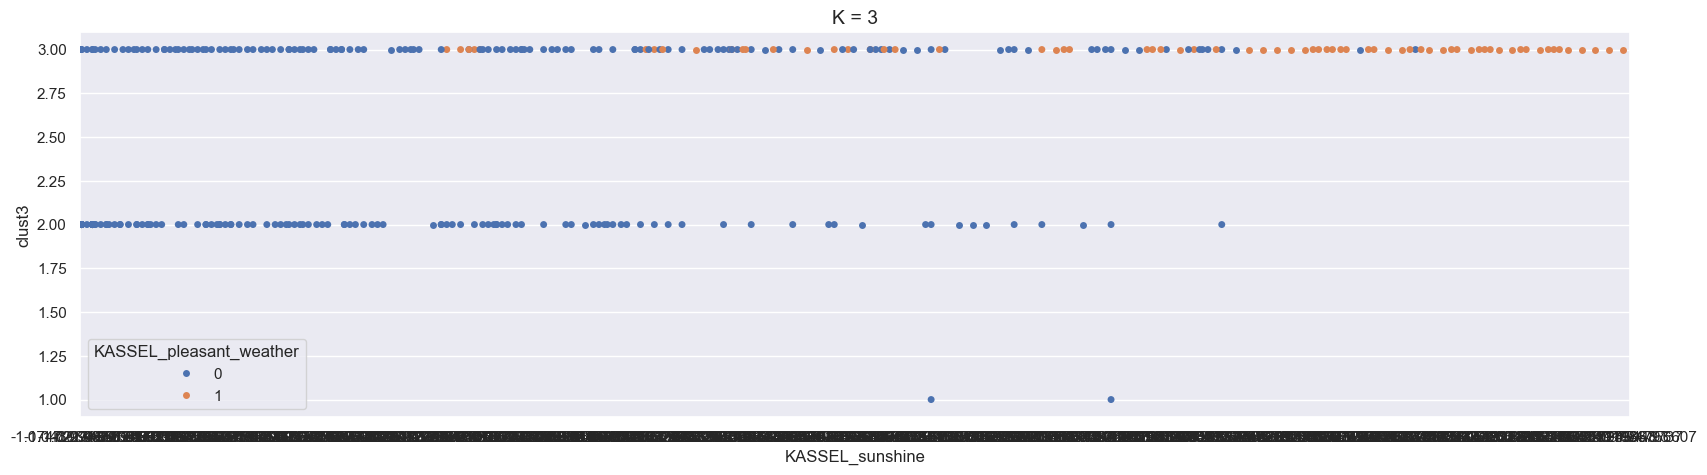

In [371]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust2", data=pc_scaled_2000_comp, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot Kassel_sunshine 2000_2cluster_complete.png')

plt.figure(figsize=(20,5))
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust3", data=pc_scaled_2000_comp, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot KASSEL_sunshine 2000_3cluster_complete.png')

##### Average

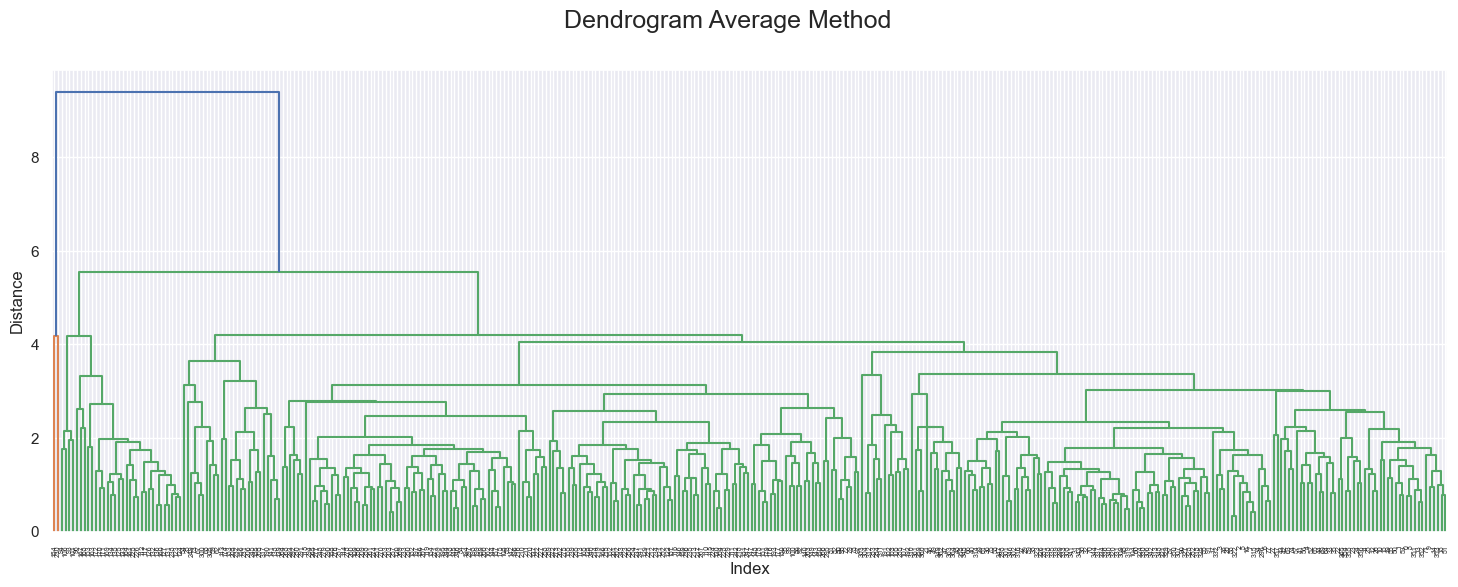

In [351]:
# Average Dendogram (using pc_scaled_2000 data)

distance_average = linkage(pc_scaled_2000.loc[:,['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'KASSEL_pleasant_weather']],method='average')
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.savefig('Dendrogram Average Method - Scaled Climate Data for Kassel Year 2000.png')
plt.show()

In [353]:
pc_scaled_2000_avg=pc_scaled_2000.copy()

pc_scaled_2000_avg['clust2']=fcluster(distance_average,2, criterion='maxclust')
pc_scaled_2000_avg['clust3']=fcluster(distance_average,3, criterion='maxclust')
pc_scaled_2000_avg.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,clust2,clust3
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,2,3
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,2,3
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,2,3
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,2,3
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,2,3


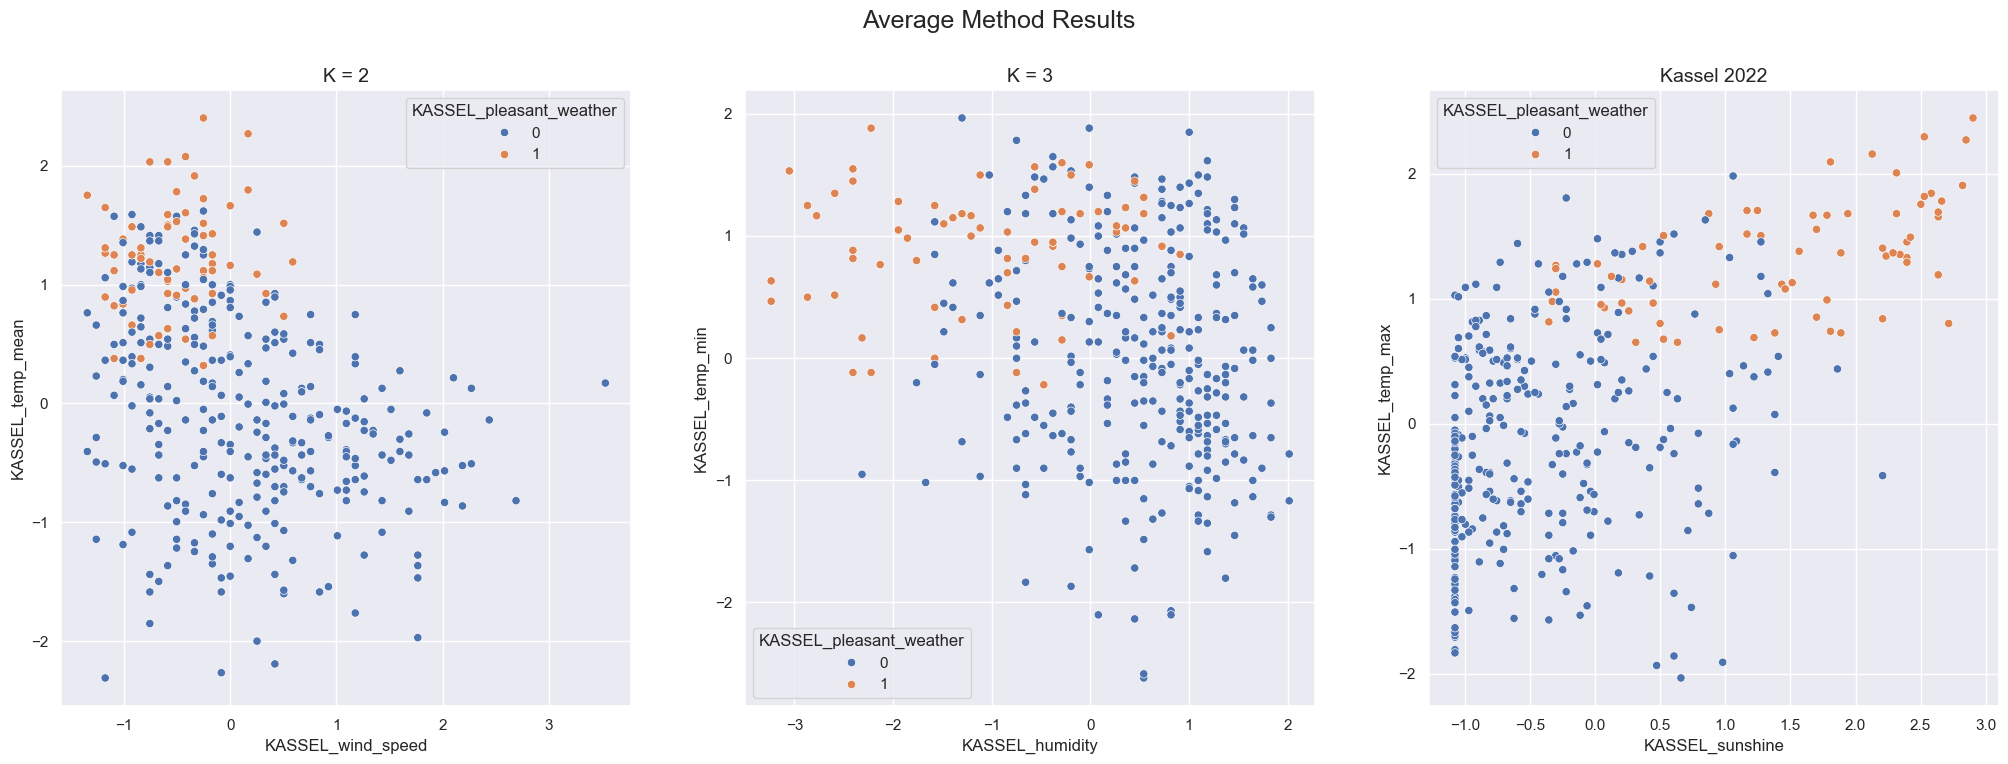

In [355]:
# Plot the clusters against the answers

plt.figure(figsize=(25,8))

plt.suptitle("Average Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="KASSEL_wind_speed",y="KASSEL_temp_mean", data=pc_scaled_2000_avg, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="KASSEL_humidity",y="KASSEL_temp_min", data=pc_scaled_2000_avg, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,3)
plt.title("Kassel 2022",fontsize=14)
sns.scatterplot(x="KASSEL_sunshine",y="KASSEL_temp_max", data=pc_scaled_2000_avg, hue="KASSEL_pleasant_weather")
plt.savefig('Scatter Plot Kassel 2000_average.png')

C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 98.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 87.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 80.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 83.3% of the points

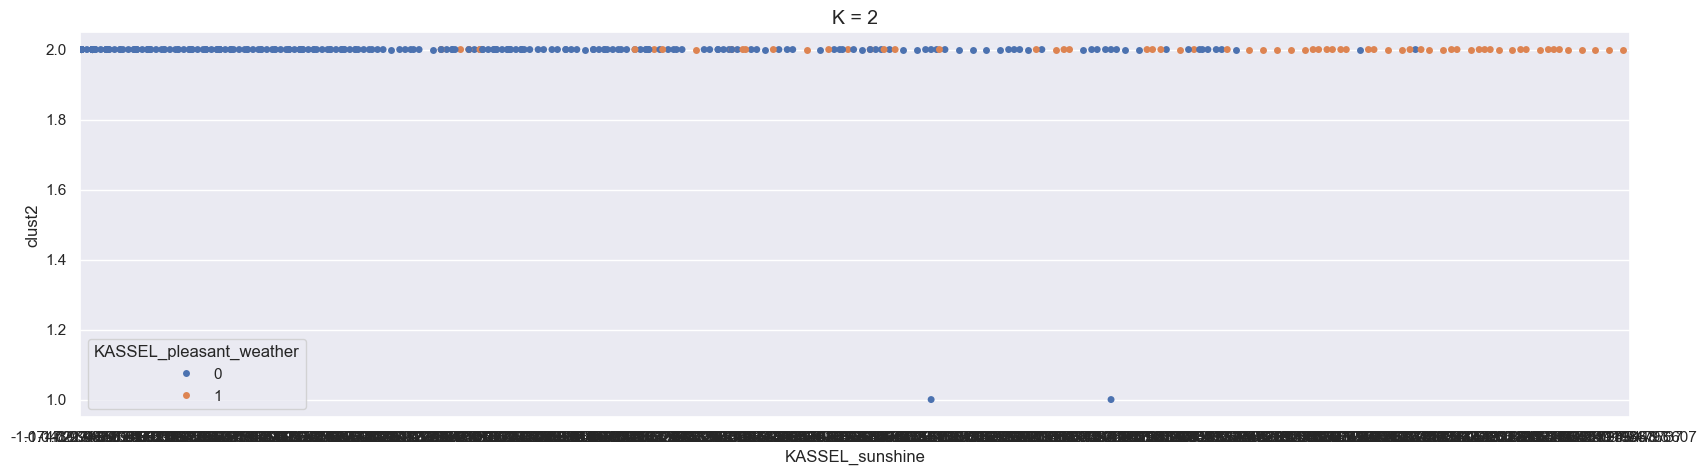

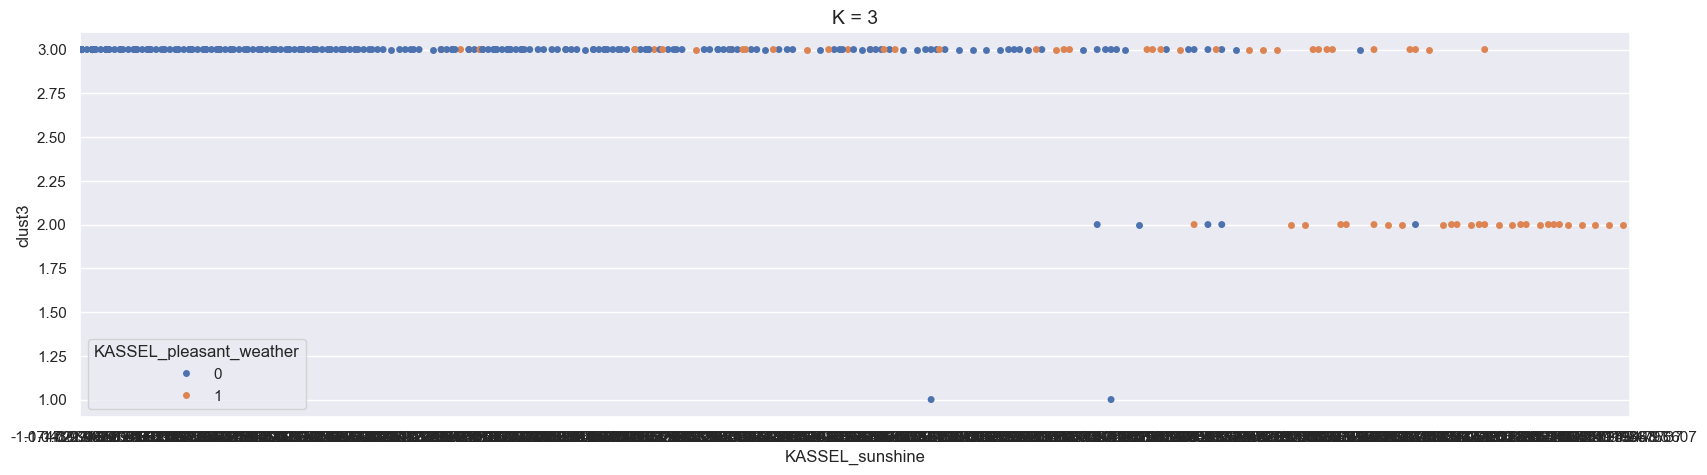

In [373]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust2", data=pc_scaled_2000_avg, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot Kassel_sunshine 2000_2cluster_average.png')

plt.figure(figsize=(20,5))
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust3", data=pc_scaled_2000_avg, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot KASSEL_sunshine 2000_3cluster_average.png')

##### Ward

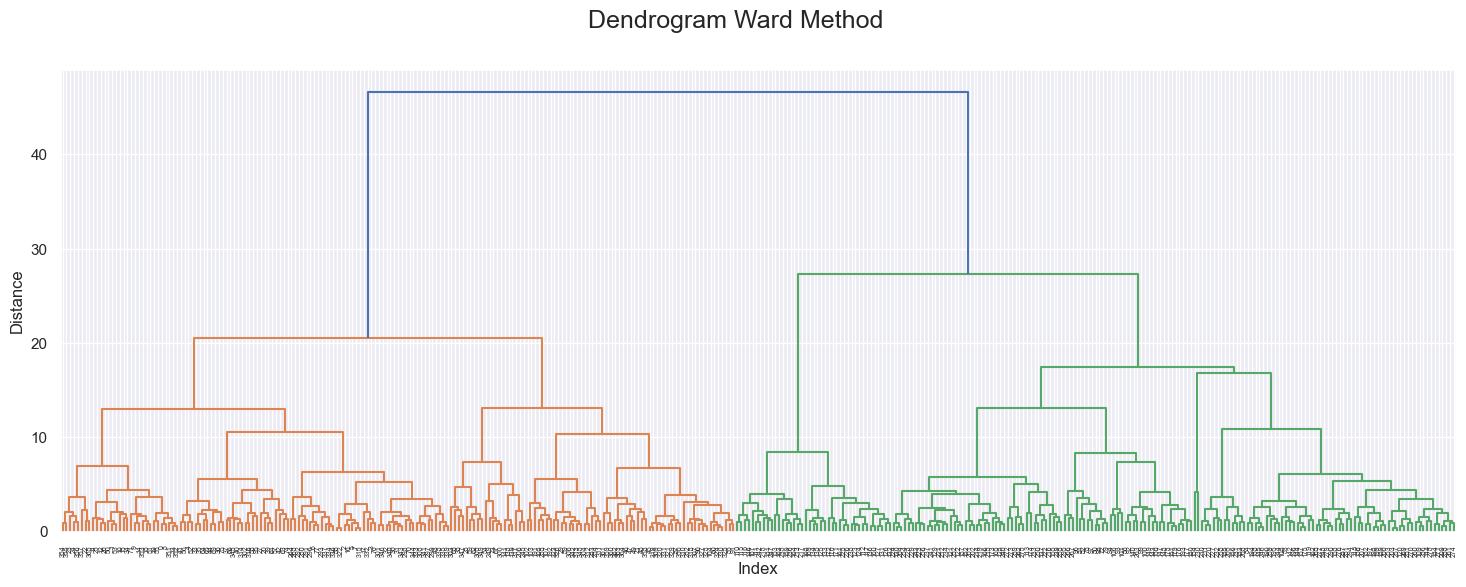

In [359]:
# Ward Dendogram (using pc_scaled_2000 data)

distance_ward = linkage(pc_scaled_2000.loc[:,['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'KASSEL_pleasant_weather']],method='ward')
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.savefig('Dendrogram Ward Method - Scaled Climate Data for Kassel Year 2000.png')
plt.show()

In [361]:
pc_scaled_2000_ward=pc_scaled_2000.copy()

pc_scaled_2000_ward['clust2']=fcluster(distance_ward,2, criterion='maxclust')
pc_scaled_2000_ward['clust3']=fcluster(distance_ward,3, criterion='maxclust')
pc_scaled_2000_ward.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,clust2,clust3
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,1,1
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,1,1
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,1,1
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,1,1
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,1,1


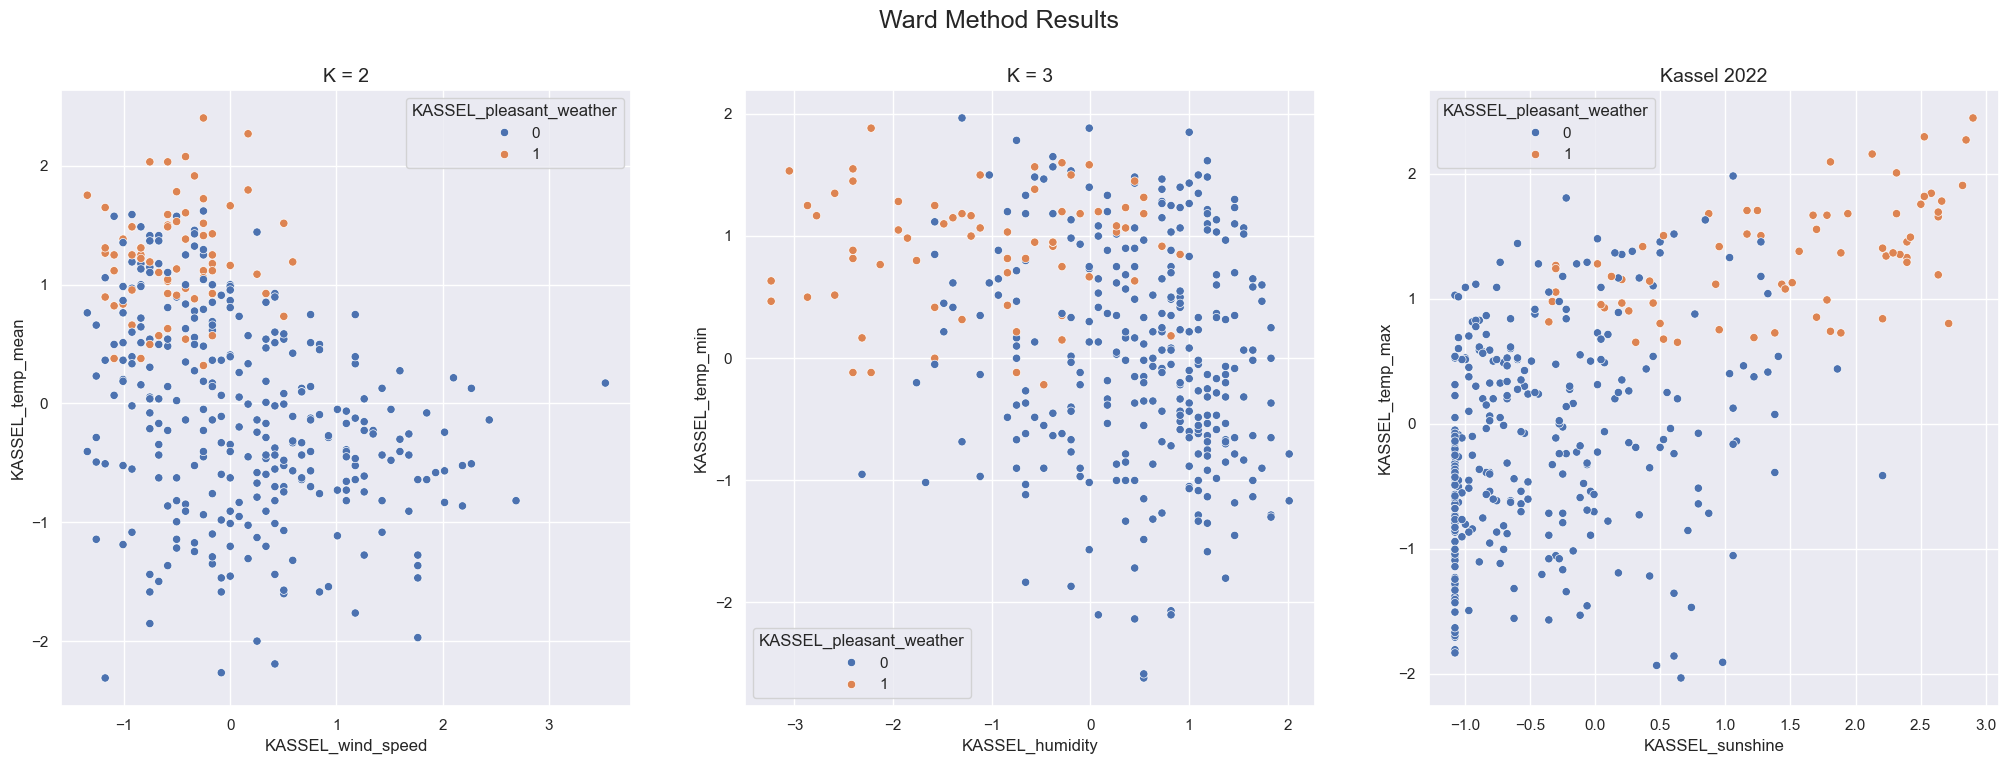

In [363]:
# Plot the clusters against the answers

plt.figure(figsize=(25,8))

plt.suptitle("Ward Method Results",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="KASSEL_wind_speed",y="KASSEL_temp_mean", data=pc_scaled_2000_ward, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="KASSEL_humidity",y="KASSEL_temp_min", data=pc_scaled_2000_ward, hue="KASSEL_pleasant_weather")

plt.subplot(1,3,3)
plt.title("Kassel 2022",fontsize=14)
sns.scatterplot(x="KASSEL_sunshine",y="KASSEL_temp_max", data=pc_scaled_2000_ward, hue="KASSEL_pleasant_weather")
plt.savefig('Scatter Plot Kassel 2000_ward.png')

C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 97.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 75.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 60.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\jmesi\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.7% of the points

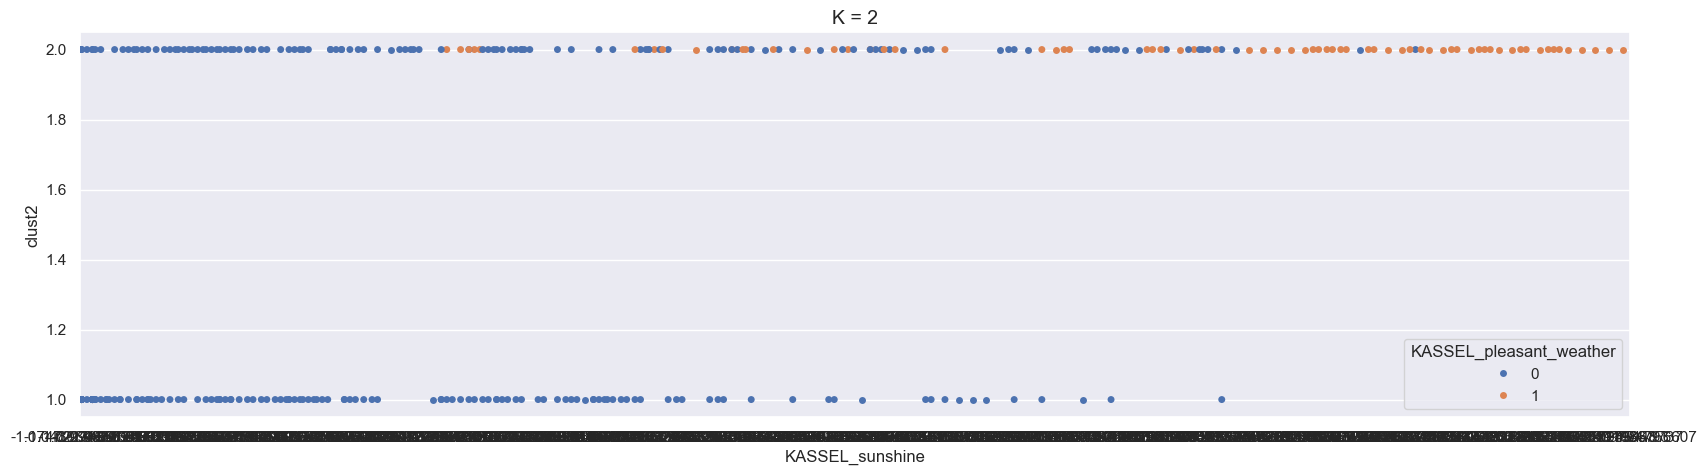

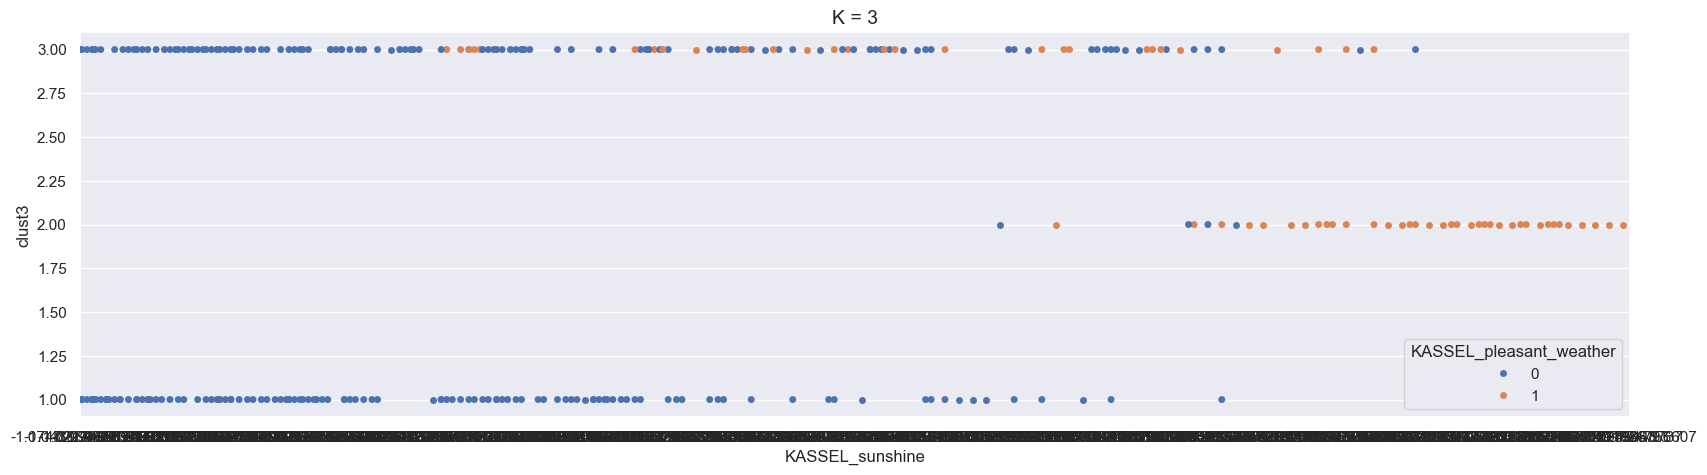

In [381]:
plt.figure(figsize=(20,5))
plt.title("K = 2",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust2", data=pc_scaled_2000_ward, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot Kassel_sunshine 2000_2cluster_ward.png')

plt.figure(figsize=(20,5))
plt.title("K = 3",fontsize=14)
sns.swarmplot(x="KASSEL_sunshine",y="clust3", data=pc_scaled_2000_ward, hue="KASSEL_pleasant_weather")
plt.savefig('Swarm Plot Kassel_sunshine 2000_3cluster_ward.png')

###### Looking at the scatterplots for the single, complete, average and ward dendrogram they are all the same. 
###### When examiningg the dendrograms we can see that the single appears to have only 2 variants and the average also has 2 variants. The complete and ward dendrogram have more variation in their decisions. The average dendrogram appears to have 3 sections but it's harder to determine the definitive sections. The ward dendrogram provides better separation.
###### When examining the swarm plots the single swarm plot plots a single line with rare plot points in their own sectins. The complete swarm plot does better work a seperating in 3 cluster but it's 2 clusters are poor. The average swarm plot has similar plots to the complete swarm plot. The ward swarm plot has better separation between the pleasant and un pleasant weather in both its clusters.

### 4. Principle Component Analysis

In [386]:
pc_scaled_2000.shape

(366, 163)

In [388]:
pc_2000 = pc_scaled_2000.columns.tolist()

In [390]:
pc_2000

['DATE',
 'BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDOR

In [430]:
pc_scaled_2000.head()

,DATE,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
14610,20000101,1.076130,-0.02793,1.187444,1.618161,-1.229941,-0.385392,-0.179228,-1.065304,-1.017527,...,0,0,0,0,0,0,0,0,0,0
14611,20000102,1.076130,-0.02793,1.006770,2.107251,-1.176243,-0.445514,-0.179228,-1.065304,-0.922462,...,0,0,0,0,0,0,0,0,0,0
14612,20000103,-0.170720,-0.02793,0.464749,2.046115,-0.907754,-0.445514,-0.179228,-0.206978,-1.112591,...,0,0,0,0,0,0,0,0,0,0
14613,20000104,0.660514,-0.02793,0.284075,1.251344,-0.768140,0.255911,-0.179228,0.535359,-0.881720,...,0,0,0,0,0,0,0,0,0,0
14614,20000105,-0.170720,-0.02793,1.277781,1.006799,-0.897015,-0.305229,-0.179228,-0.206978,-0.596526,...,0,0,0,0,0,0,0,0,0,0


In [486]:
# Run the PCA model, reducing to 2 components

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(pc_scaled_2000)

In [488]:
principalComponents

array([[-5.66149633e+02,  1.01723413e+01],
       [-5.65146146e+02,  9.10225638e+00],
       [-5.64137372e+02,  9.07215985e+00],
       [-5.63138450e+02,  8.29889489e+00],
       [-5.62132801e+02,  8.50789650e+00],
       [-5.61131931e+02,  8.11370639e+00],
       [-5.60136185e+02,  8.52931519e+00],
       [-5.59140791e+02,  8.07187997e+00],
       [-5.58147238e+02,  9.45855791e+00],
       [-5.57160476e+02,  9.80942627e+00],
       [-5.56157743e+02,  9.23796635e+00],
       [-5.55154847e+02,  8.97647386e+00],
       [-5.54146023e+02,  9.62470488e+00],
       [-5.53148924e+02,  9.18919482e+00],
       [-5.52166298e+02,  9.93653727e+00],
       [-5.51167633e+02,  1.00348664e+01],
       [-5.50158590e+02,  8.82446648e+00],
       [-5.49147323e+02,  8.86605196e+00],
       [-5.48167698e+02,  7.81828441e+00],
       [-5.47166386e+02,  8.79886589e+00],
       [-5.46158885e+02,  8.26668427e+00],
       [-5.45147298e+02,  9.89606171e+00],
       [-5.44161007e+02,  1.10636779e+01],
       [-5.

In [490]:
# Make a dataframe of the new components

dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2',])

In [492]:
dfPCA

,PCA1,PCA2
0,-566.149633,10.172341
1,-565.146146,9.102256
2,-564.137372,9.072160
3,-563.138450,8.298895
4,-562.132801,8.507896
...,...,...
361,559.879481,11.830213
362,560.878234,12.307143
363,561.867987,12.662002
364,562.850914,12.188961


In [494]:
# Add the pleasant weather to the dataframe to show the relationship

pleasant_weather = [pleasant[['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]]
pleasant_weather

[       BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
 0                           0                          0   
 1                           0                          0   
 2                           0                          0   
 3                           0                          0   
 4                           0                          0   
 ...                       ...                        ...   
 22945                       0                          0   
 22946                       0                          0   
 22947                       0                          0   
 22948                       0                          0   
 22949                       0                          0   
 
        BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
 0                              0                        0   
 1                              0                        0   
 2                              0                        0   
 3                

In [496]:
dfPCA[['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]= pleasant[['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]

In [498]:
dfPCA

,PCA1,PCA2,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,-566.149633,10.172341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-565.146146,9.102256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-564.137372,9.072160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-563.138450,8.298895,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-562.132801,8.507896,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,559.879481,11.830213,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,560.878234,12.307143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,561.867987,12.662002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364,562.850914,12.188961,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x232f19dd580>,
 [Text(0, 0, '-566.1496325410585'),
  Text(40, 0, '-457.14769805960736'),
  Text(80, 0, '-346.15404915386'),
  Text(120, 0, '-237.10985325995142'),
  Text(149, 0, '-138.1104137125834')])

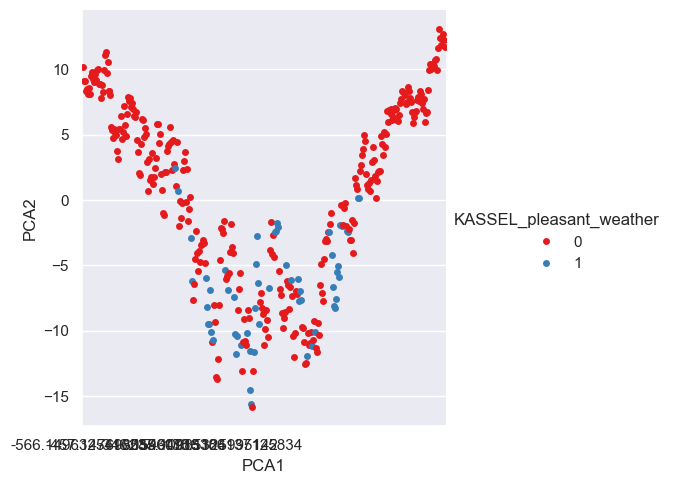

In [500]:
# Plot the two components, color coded by Kassel Pleasant Weather

sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="KASSEL_pleasant_weather", data=dfPCA)
plt.savefig('Scatter Plot PCA Kassel 2000.png')
plt.xticks([0, 40, 80, 120, 149])

###### It's easy to see where the pleasant and unpleasant weather lies even with just 2 components. It appears there are more unpleasant weather(0) values than there are pleasant weather(1) values.

In [503]:
# Run the PCA model, reducing to 1 component

pca = PCA(n_components=1)
principalComponents2 = pca.fit_transform(pc_scaled_2000)

In [505]:
principalComponents2

array([[-566.14963254],
       [-565.14614589],
       [-564.13737242],
       [-563.13844956],
       [-562.13280097],
       [-561.13193093],
       [-560.13618509],
       [-559.14079111],
       [-558.14723845],
       [-557.1604756 ],
       [-556.15774344],
       [-555.15484702],
       [-554.14602322],
       [-553.14892406],
       [-552.16629756],
       [-551.16763289],
       [-550.15859003],
       [-549.14732306],
       [-548.16769771],
       [-547.16638615],
       [-546.15888456],
       [-545.14729845],
       [-544.1610066 ],
       [-543.21177203],
       [-542.19242974],
       [-541.1862707 ],
       [-540.17049545],
       [-539.15690083],
       [-538.11642168],
       [-537.12198264],
       [-536.12790507],
       [-466.12732239],
       [-465.13072172],
       [-464.15867886],
       [-463.15917405],
       [-462.14141144],
       [-461.13316179],
       [-460.12222823],
       [-459.11434507],
       [-458.1376291 ],
       [-457.14769806],
       [-456.151

In [507]:
# Add the species to the dataframe to show the relationship

dfPCA2 = pd.DataFrame(principalComponents2, columns=['PCA1'])
dfPCA2['y']= 0
dfPCA2[['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]= pleasant[['BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]
dfPCA2

,PCA1,y,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,-566.149633,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-565.146146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-564.137372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-563.138450,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-562.132801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,559.879481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
362,560.878234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,561.867987,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
364,562.850914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


([<matplotlib.axis.XTick at 0x232f8555580>,
 [Text(0, 0, '-566.1496325410585'),
  Text(40, 0, '-457.14769805960736'),
  Text(80, 0, '-346.15404915386'),
  Text(120, 0, '-237.10985325995142'),
  Text(149, 0, '-138.1104137125834')])

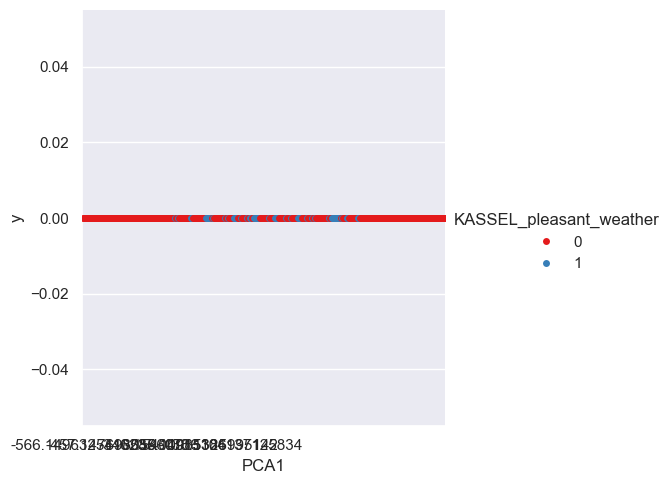

In [509]:
# Plot the component, color coded by Kassel Pleasant weather

sns.set_theme()
g = sns.catplot(x="PCA1", y='y', palette='Set1', hue="KASSEL_pleasant_weather", data=dfPCA2)
plt.savefig('Scatter Plot PCA Kassel 2000_2.png')
plt.xticks([0, 40, 80, 120, 149])

###### You can still easily see unpleasant weather (0) and pleasant weather (1) even with this linear data.

### 5. Exporting

In [474]:
path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 2 - Real-World Application of Machine Learning'

In [516]:
pc_scaled.to_csv(os.path.join(path, 'ClimateWins', 'Unsupervised Learning', 'ML2_2.1_pleasant_climate.csv'))

In [517]:
dfPCA.to_csv(os.path.join(path, 'ClimateWins', 'Unsupervised Learning', 'ML2_2.1_dfPCA.csv'))

In [518]:
dfPCA2.to_csv(os.path.join(path, 'ClimateWins', 'Unsupervised Learning', 'ML2_2.1_dfPCA2.csv'))